<h1 style="text-align: center; font-family: 'Jetbrains Mono'; color: purple;"><b>Exercise set 3</b></h1>




In [2]:
#Import package
import numpy as np 
import pandas as pd
from PIL import Image

#seaborn: 
import seaborn as sns
import openpyxl

In [3]:
df_can = pd.read_excel("https://bit.ly/32HXvZB", sheet_name="Canada by Citizenship", skiprows=range(20), skipfooter=2)
print("Data download and read into dataframe!")
df_can.head()

Data download and read into dataframe!


,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


<h2 style="text-align: left; font-family: 'JetBrains Mono'; color: black;"><i>1: Regression Plot</i></h2>


In [5]:
df_can.drop(["AREA","REG","DEV","Type","Coverage"], axis = 1, inplace =  True)
df_can.rename(
    columns={
        "OdName" : "Country",
        "AreaName": "Continent",
        "RegName": "Religion"
    },
    inplace = True
)


#make columns be consistency

df_can.columns = list(map(str, df_can.columns))
df_can.set_index("Country", inplace = True)
df_can["Total"] = df_can.sum(axis = 1, numeric_only= True)

years = list(map(str, range(1980,2014)))
print("Data dimension is: ", df_can.shape)

Data dimension is:  (195, 38)


In [6]:
df_tot = pd.DataFrame(df_can[years].sum(axis = 0)); df_tot.head()

df_tot.index = map(float, df_tot.index)
df_tot.reset_index(inplace = True)
df_tot.columns
df_tot.columns = ["year","total"]
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


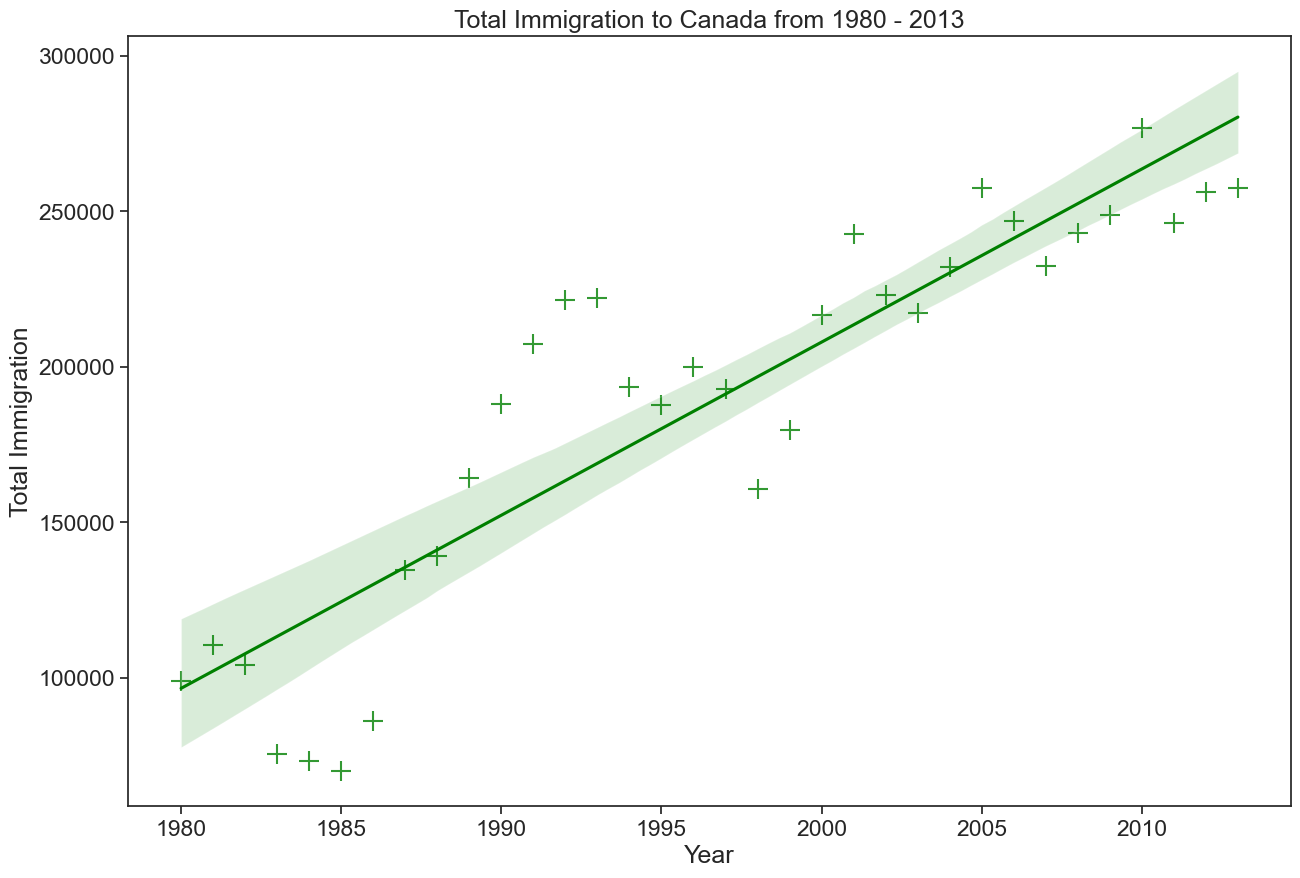

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style("ticks")

ax = sns.regplot(x="year", y="total", data=df_tot, color="green", marker="+", scatter_kws={'s':200})

ax.set(
    xlabel="Year",
    ylabel="Total Immigration",
    title="Total Immigration to Canada from 1980 - 2013"
)
plt.show();

<h2 style="text-align: left; font-family: 'JetBrains Mono'; color: black;"><i>Question 1:Use seaborn to create a scatter plot with a regression line to visualize
the total immigration from Denmark, Sweden, and Norway to Canada from 1980 to
2013</i></h2>


In [9]:
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

df_total = pd.DataFrame(df_countries.sum(axis=1))

df_total.reset_index(inplace=True)

df_total.columns = ['year', 'total']

df_total['year'] = df_total['year'].astype(int)

df_total.tail(3)

,year,total
31,2011,276
32,2012,287
33,2013,280


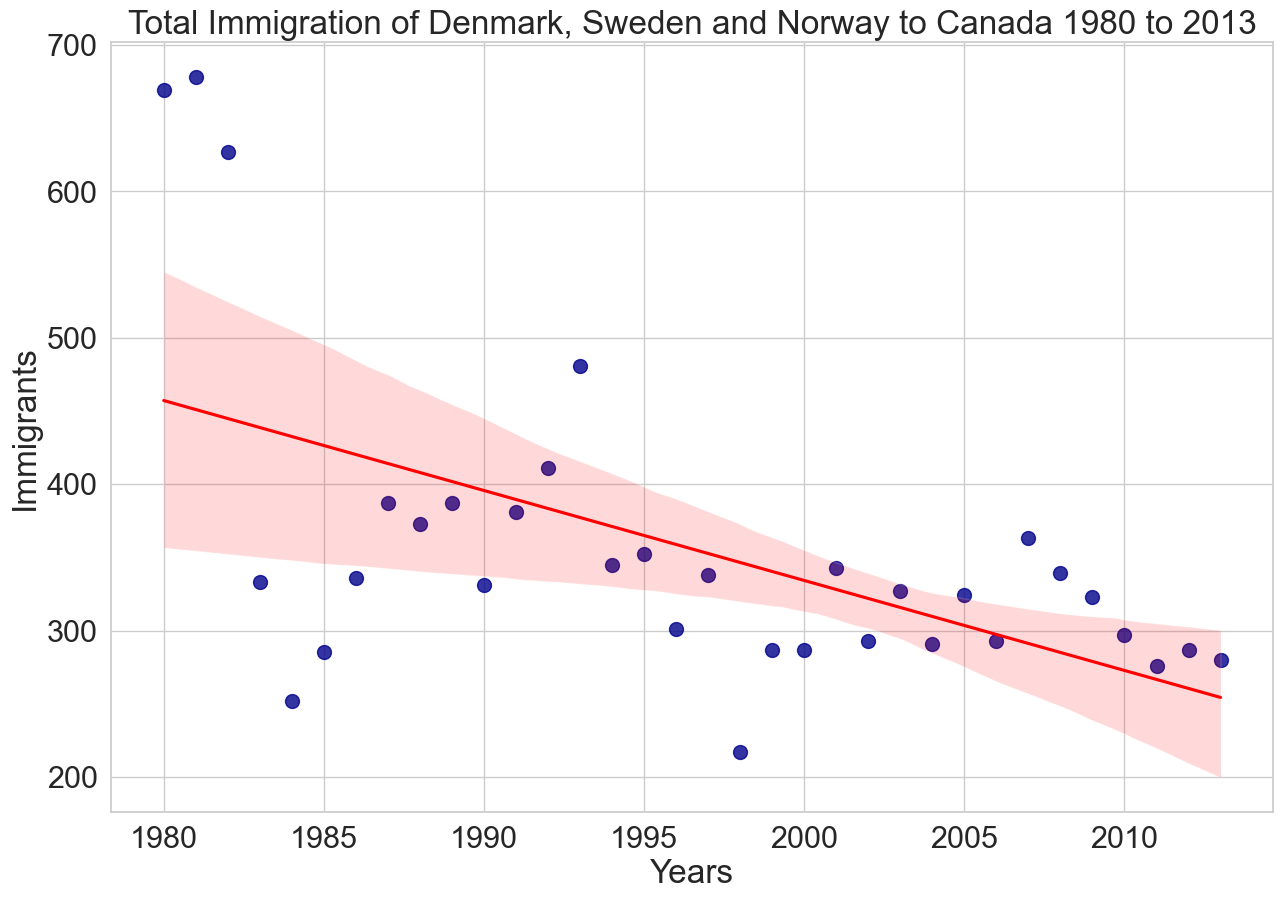

In [10]:
plt.figure(figsize=(15, 10))

sns.set_theme(
    style = "whitegrid",
    font_scale= 2,
    font = "Arial"
)
ax = sns.regplot(
    x="year", 
    y="total", 
    data=df_total, 
    scatter_kws={"s":100, "color":"darkblue"}, 
    line_kws={"color":"red"}
)
ax.set(
    xlabel = "Years",
    ylabel = "Immigrants",
    title = "Total Immigration of Denmark, Sweden and Norway to Canada 1980 to 2013"
)
plt.show()


<h2 style="text-align: left; font-family: 'JetBrains Mono'; color: black;"><i>2: Word Clouds</i></h2>


Word clouds are commonly used to perform high-level analysis and visualization of
text data. Accordinly, let’s digress from the immigration dataset and work with
an example that involves analyzing text data. Let’s try to analyze a short novel
written by Lewis Carroll titled Alice’s Adventures in Wonderland. Let’s go ahead
and download a .txt file of the novel.

In [1]:
# install wordcloud
! pip3 install wordcloud

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Defaulting to user installation because normal site-packages is not writeable
Wordcloud is installed and imported!


In [5]:
alice_novel = open("C:/Users/phath/Downloads/alice_novel.txt", "r").read()
print("File download and saved")

File download and saved


Next, let’s use the stopwords that we imported from word cloud. We use the function
4
set to remove any redundant stopwords.

In [7]:
stopwords = set(STOPWORDS)

Create a word cloud object and generate a word cloud. For simplicity, let’s generate
a word cloud using only the first 2000 words in the novel.

In [ ]:
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)

In [ ]:
# display the word cloud
import matplotlib as plt
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Let’s generate sample text data from our immigration dataset, say text data of 90
words.
Using countries with single-word names, let’s duplicate each country’s name based
on how much they contribute to the total immig

In [ ]:
total_immigration = df_can['Total'].sum()
total_immigration
max_words = 90
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if country.count(" ") == 0:
        repeat_num_times = int(df_can.loc[country, 'Total'] / total_immigration * max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

# display the generated text
word_string

# Create the word cloud

In [ ]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')
# display the cloud
plt.figure(figsize=(14, 18))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()